<a href='https://huntsman.usu.edu/directory/jahangiry-pedram'> <img src="logo.jpg" /></a>

___
## Prof. Pedram Jahangiry 

# Explanatory Data Analysis: EDA
Exploratory data analysis [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis)  is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. Here is an [example.](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)


First we need to import some libraries: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  #if you want to use seaborn themes with matplotlib functions

### Data Preprocessing

In [2]:
df = pd.read_csv('wage.csv')
df.head(5)

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,769000.0,40,93,12,11,2,31,1,0,8.0,8.0
1,808000.0,50,119,18,11,16,37,1,0,14.0,14.0
2,825000.0,40,108,14,11,9,33,1,0,14.0,14.0
3,650000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,562000.0,40,74,11,14,5,34,1,0,6.0,11.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
wage       935 non-null float64
hours      935 non-null int64
IQ         935 non-null int64
educ       935 non-null int64
exper      935 non-null int64
tenure     935 non-null int64
age        935 non-null int64
married    935 non-null int64
black      935 non-null int64
meduc      857 non-null float64
feduc      741 non-null float64
dtypes: float64(3), int64(8)
memory usage: 80.4 KB


In [3]:
df.shape

(935, 11)

### let's figure out what should be the type of each feature?

* Starting by counting the unique elements for each variable:

In [5]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc', 'feduc'],
      dtype='object')

In [8]:
df.black.nunique()
#df['black'].nunique()

2

In [6]:
df.married.nunique()

2

In [11]:
for col in df.columns:
    print(col, df[col].nunique())

wage 449
hours 37
IQ 80
educ 10
exper 22
tenure 23
age 11
married 2
black 2
meduc 19
feduc 18


* We can also  tabularize the variables of interest using value_counts() function from pandas. 

In [13]:
for col in ['black', 'married', 'educ']:
    print(df[col].value_counts())

0    815
1    120
Name: black, dtype: int64
1    835
0    100
Name: married, dtype: int64
12    393
16    150
13     85
14     77
18     57
15     45
11     43
17     40
10     35
9      10
Name: educ, dtype: int64


* apparantly *black* and *married* should be categorical variables and the rest of them be numerics. 

In [14]:
categoricals =['black','married']
numerics     =['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age','meduc', 'feduc'] # can you think of an easier way to do this?

In [21]:
list(df.drop(['black','married'], axis=1).columns)

['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'meduc', 'feduc']

In [22]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc', 'feduc'],
      dtype='object')

In [23]:
for col in categoricals:
    df[col]=df[col].astype("category")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
wage       935 non-null float64
hours      935 non-null int64
IQ         935 non-null int64
educ       935 non-null int64
exper      935 non-null int64
tenure     935 non-null int64
age        935 non-null int64
married    935 non-null category
black      935 non-null category
meduc      857 non-null float64
feduc      741 non-null float64
dtypes: category(2), float64(3), int64(6)
memory usage: 67.8 KB


In [25]:
for col in numerics:
    df[col]=pd.to_numeric(df[col], errors='coerce')
    # alternatively we could have used df[col].astype('int64'). Why did we prefere pd.to_numeric?

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
wage       935 non-null float64
hours      935 non-null int64
IQ         935 non-null int64
educ       935 non-null int64
exper      935 non-null int64
tenure     935 non-null int64
age        935 non-null int64
married    935 non-null category
black      935 non-null category
meduc      857 non-null float64
feduc      741 non-null float64
dtypes: category(2), float64(3), int64(6)
memory usage: 67.8 KB


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wage,935.0,957945.454545,404360.822474,115000.0,669000.0,905000.0,1160000.0,3078000.0
hours,935.0,43.929412,7.224256,20.0,40.0,40.0,48.0,80.0
IQ,935.0,101.282353,15.052636,50.0,92.0,102.0,112.0,145.0
educ,935.0,13.468449,2.196654,9.0,12.0,12.0,16.0,18.0
exper,935.0,11.563636,4.374586,1.0,8.0,11.0,15.0,23.0
tenure,935.0,7.234225,5.075206,0.0,3.0,7.0,11.0,22.0
age,935.0,33.080214,3.107803,28.0,30.0,33.0,36.0,38.0
meduc,857.0,10.682614,2.849756,0.0,8.0,12.0,12.0,18.0
feduc,741.0,10.217274,3.300700,0.0,8.0,10.0,12.0,18.0


In [29]:
# hmmm? what about categorical variables?
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
wage,935.0,NaN,NaN,NaN,957945.454545,404360.822474,115000.0,669000.0,905000.0,1160000.0,3078000.0
hours,935.0,NaN,NaN,NaN,43.929412,7.224256,20.0,40.0,40.0,48.0,80.0
IQ,935.0,NaN,NaN,NaN,101.282353,15.052636,50.0,92.0,102.0,112.0,145.0
educ,935.0,NaN,NaN,NaN,13.468449,2.196654,9.0,12.0,12.0,16.0,18.0
exper,935.0,NaN,NaN,NaN,11.563636,4.374586,1.0,8.0,11.0,15.0,23.0
tenure,935.0,NaN,NaN,NaN,7.234225,5.075206,0.0,3.0,7.0,11.0,22.0
age,935.0,NaN,NaN,NaN,33.080214,3.107803,28.0,30.0,33.0,36.0,38.0
married,935.0,2.0,1.0,835.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
black,935.0,2.0,0.0,815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meduc,857.0,NaN,NaN,NaN,10.682614,2.849756,0.0,8.0,12.0,12.0,18.0


### Exercise: 
1. What do you learn by comparing the mean and median for wage? 
2. Which of the OLS assumptions is violated? What's the implication for econometrics linear regression analysis? 

In [10]:
df.isna().sum()
# or # df.isnull().sum() / len(df)
# Alternatively we could use isnull() from pandas. 
# pd.isnull(df).sum() 

wage         0
hours        0
IQ           0
educ         0
exper        0
tenure       0
age          0
married      0
black        0
meduc       78
feduc      194
dtype: int64

In [11]:
df.isna().sum() / len(df)

wage       0.000000
hours      0.000000
IQ         0.000000
educ       0.000000
exper      0.000000
tenure     0.000000
age        0.000000
married    0.000000
black      0.000000
meduc      0.083422
feduc      0.207487
dtype: float64

### Plotting the NA values

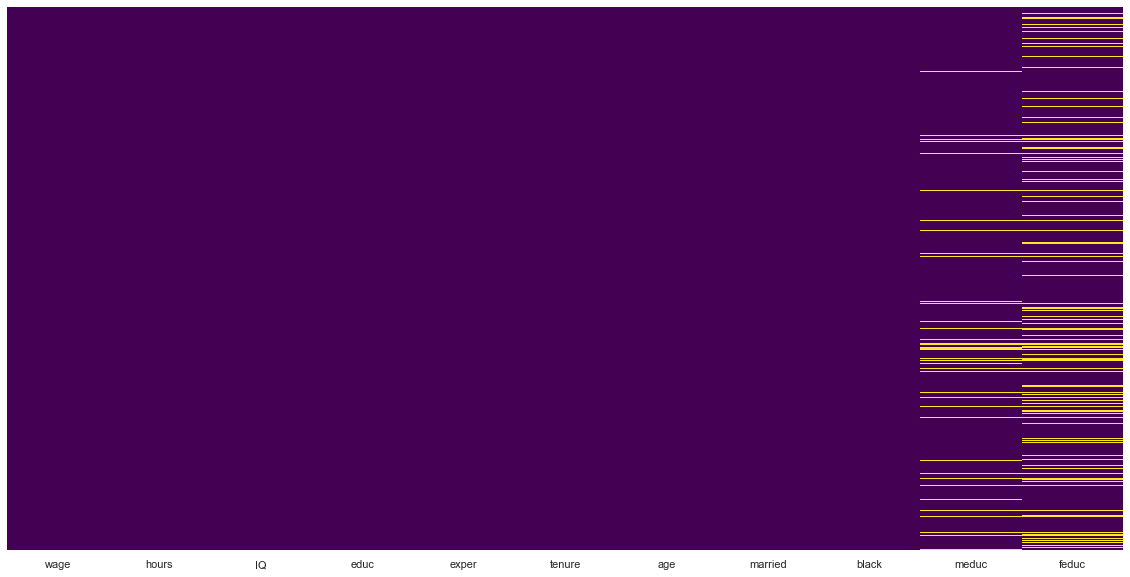

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')
#sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

1. Because the number of NAs in feduc and meduc is greater that 5% of the observations, we should not keep them in the regression model. Alternatively we could do an imputation.

2. Here, let's drop the father education and impute the mother education. 

In [25]:
df.drop('feduc', axis=1, inplace=True) #why do we need inplace?
# We set inplace to true in order to feduc from the dataset

In [36]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc'],
      dtype='object')

In [21]:
df.meduc.median()
print("The median is  :" + " ",df.meduc.median()," and the mean is  :" + " ",df.meduc.mean())

The median is  :  12.0  and the mean is  :  10.682613768961494


In [23]:
# we will replace the missing meduc with median. Because the data is left skewed 
# mean is not a good representation of the central tendency measure.

df['meduc'].fillna(df['meduc'].median(),axis=0, inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    float64
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   educ     935 non-null    int64  
 4   exper    935 non-null    int64  
 5   tenure   935 non-null    int64  
 6   age      935 non-null    int64  
 7   married  935 non-null    int64  
 8   black    935 non-null    int64  
 9   meduc    935 non-null    float64
 10  feduc    741 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 80.5 KB


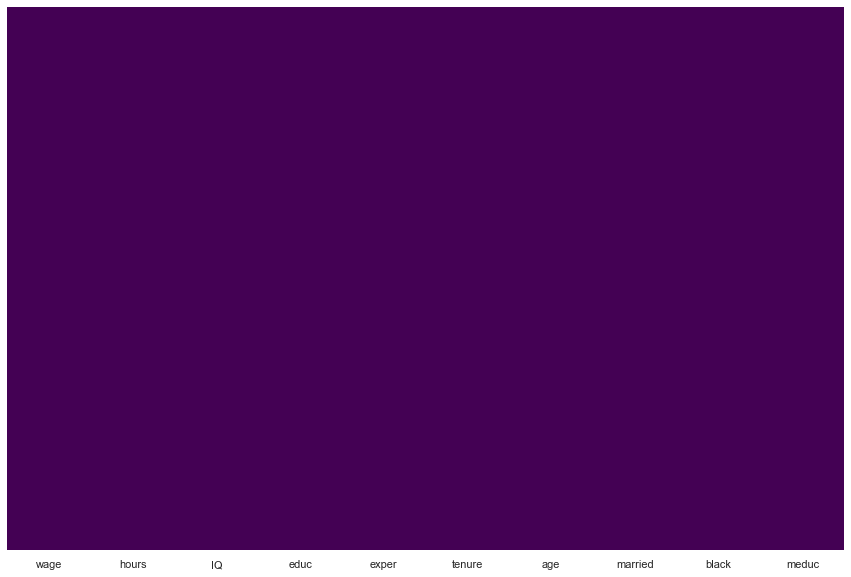

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

### Data visualization

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


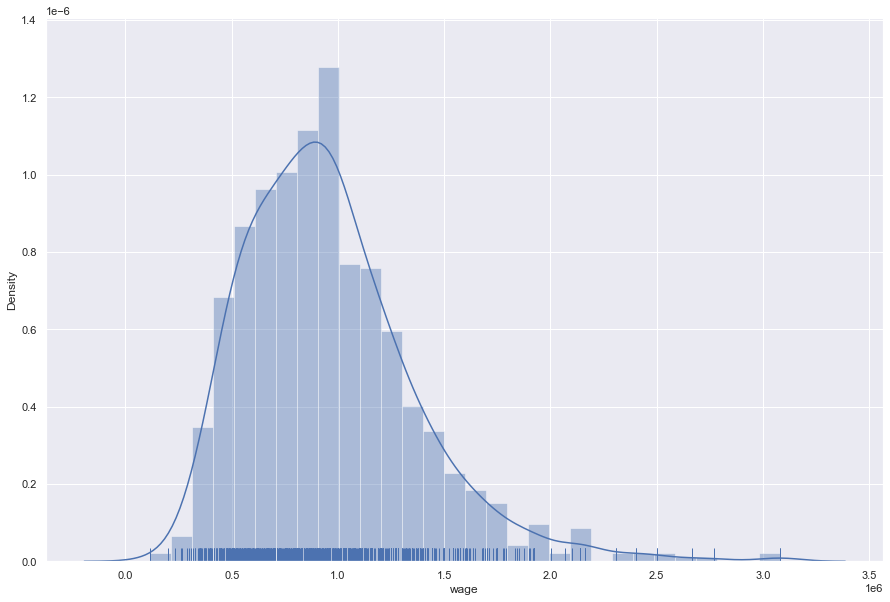

In [31]:
plt.figure(figsize=(15,10))
sns.distplot(df['wage'], bins=30 , rug=True ,color="b")
plt.show()

**Challenge**: Can you plot the distplot for black vs non-black on the same graph? can you change the size of the plot?

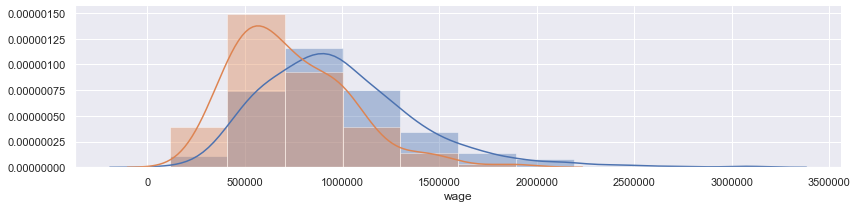

In [18]:
# Dont write any code here

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


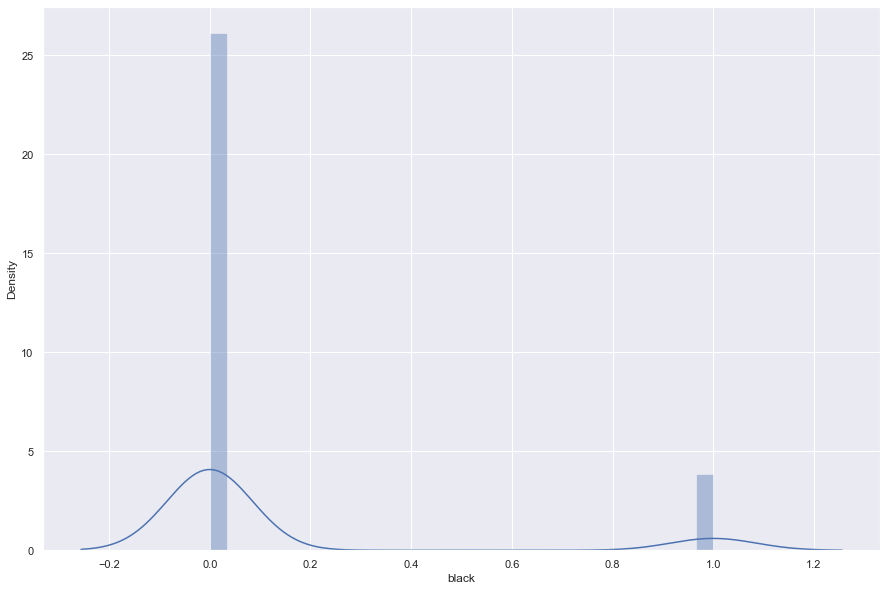

In [47]:
plt.figure(figsize=(15,10))
sns.distplot(df['black'],color="b")
plt.show()

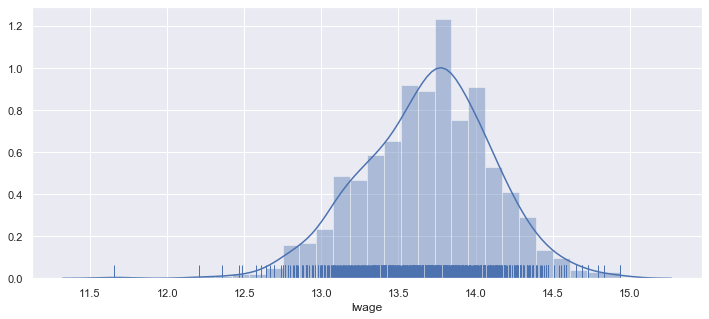

In [41]:
# Need to do log transformation to avoid potential heteroskedasticity. We don't need to do it for ML though!
plt.figure(figsize=(12,5))
df['lwage']= np.log(df['wage'])
sns.distplot(df['lwage'], bins=30 , rug=True)
plt.show()

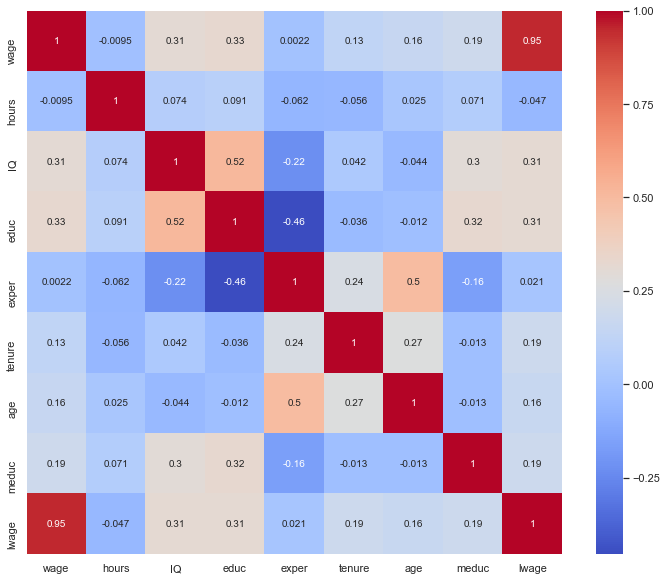

In [42]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

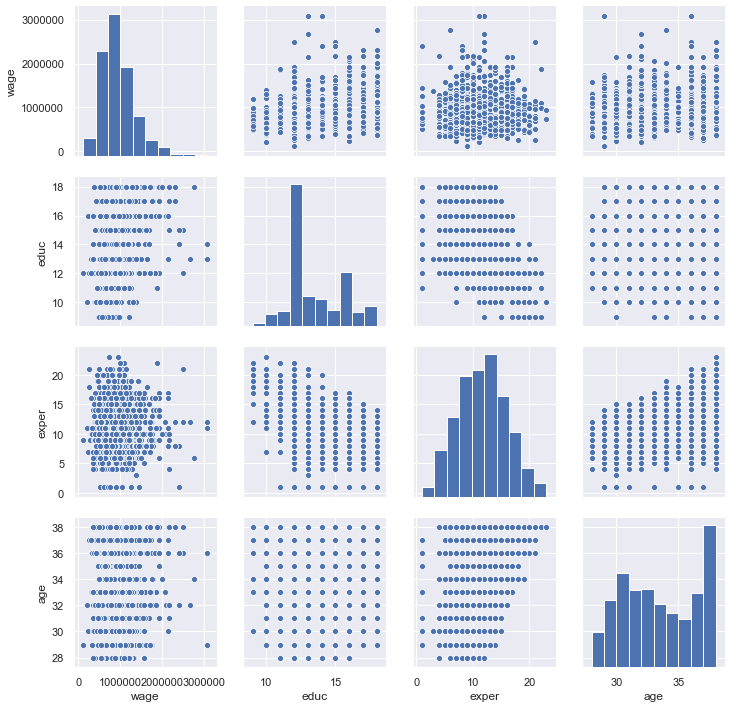

In [43]:
sns.pairplot(df[['wage', 'educ','exper','age']])
plt.show()

### Exercise:
Try to plot the same pairplot for different categories of married vs non-married! What do you learn by simply looking at your new plot?

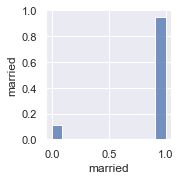

In [50]:

sns.pairplot(df[["married"]])

### Grouping the data based on different categories: 

Let's summarize the data based on different categories using groupby() method and do some visualizations. 

In [53]:
df[['wage','educ','age','black','married']].groupby(by=['married']).mean()

,wage,educ,age,black
married,,,,
0,798440.000000,13.840000,32.12000,0.180000
1,977047.904192,13.423952,33.19521,0.122156


#### excersize:
Can you do groupby by multiple columns? like black and married?

Now let's do some group plots:

In [54]:
df_group_married = df[['wage','educ','age','black','married']].groupby(by=['married']).mean().reset_index()
df_group_married

,married,wage,educ,age,black
0,0,798440.000000,13.840000,32.12000,0.180000
1,1,977047.904192,13.423952,33.19521,0.122156


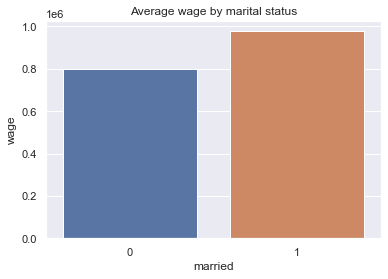

In [55]:
sns.barplot(y='wage', x='married', data=df_group_married)
plt.title('Average wage by marital status')
plt.show()

**Challenge**: replicate the following chart!

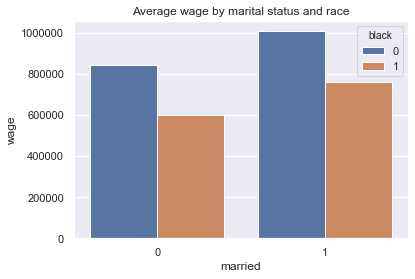

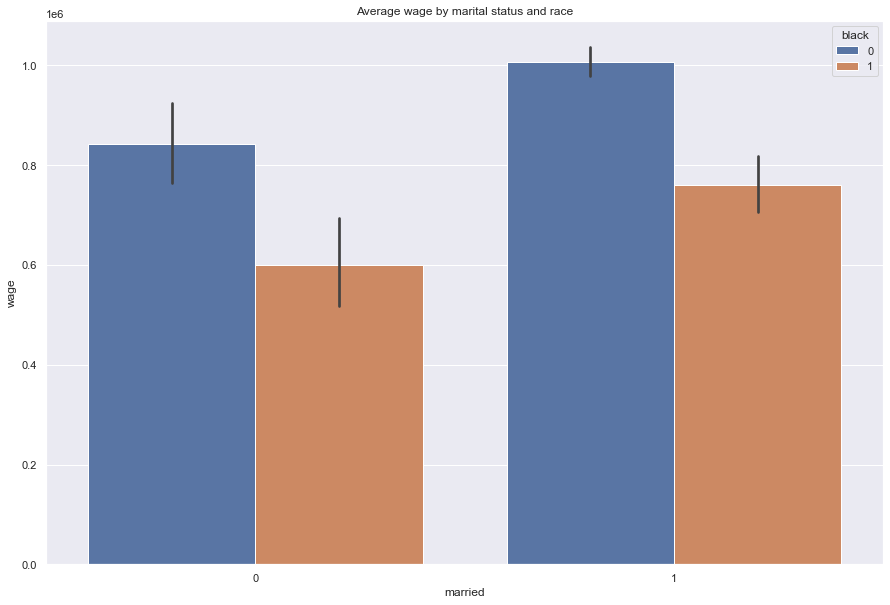

In [106]:
plt.figure(figsize=(15,10))
sns.barplot(y="wage",x="married" , hue="black",data=df)
# sns.barplot(x="married", hue="black",data=df_group_married)
# sns.barplot()
plt.title('Average wage by marital status and race')
plt.show()

In [102]:
df_group_married.black
# round(df_group_married.black,0)

0    0.180000
1    0.122156
Name: black, dtype: float64

#### making dummy variables:
This is not part of the EDA. We are going to use it later in the course. 

In [52]:
df_dummy= pd.get_dummies(df, drop_first=True)
df_dummy.head()

,wage,hours,IQ,educ,exper,tenure,age,meduc,lwage,married_1,black_1
0,769000.0,40,93,12,11,2,31,8.0,13.552846,1,0
1,808000.0,50,119,18,11,16,37,14.0,13.602317,1,0
2,825000.0,40,108,14,11,9,33,14.0,13.623139,1,0
3,650000.0,40,96,12,13,7,32,12.0,13.384728,1,0
4,562000.0,40,74,11,14,5,34,6.0,13.239257,1,0


in this example, since black and married are already dummy variables, we didn't need to do this. 

### Exercise: 
Why do we need to use drop_first = True? Does this matter for machine learning?

### links:
1. What is EDA, Exploratory data analysis? https://en.wikipedia.org/wiki/Exploratory_data_analysis)
